<a href="https://colab.research.google.com/github/22Ifeoma22/22Ifeoma22/blob/main/MNIST_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_openml
import pandas as pd


In [ ]:
mnist = fetch_openml('mnist_784', as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
X, y= mnist.data,mnist.target
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
def plot_digit(image_data):
  image = image_data.reshape(28, 28)
  plt.imshow(image, cmap="binary")
  plt.axis("off")

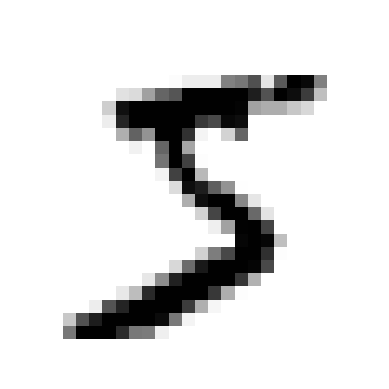

In [ ]:
some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [ ]:
y[0]

'5'

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:],X[:60000], X[60000:]

#Training a Binary Classifier

In [ ]:
y_train_5 = (y_train =='5') # True for all ss, False for all other digits
y_test_5 = (y_test =='5')

# The SGDC is able to handle large dataset efficiently.It deals with training instances independently and suitable for online learning

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd_clf = SGDClassifier()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
Training accuracy: 0.9745892857142857
Testing accuracy: 0.9697142857142858

Classification Report (Test Data):
               precision    recall  f1-score   support

       False       0.98      0.99      0.98     12727
        True       0.88      0.78      0.82      1273

    accuracy                           0.97     14000
   macro avg       0.93      0.88      0.90     14000
weighted avg       0.97      0.97      0.97     14000

Confusion Matrix (Test Data):
 [[12588   139]
 [  285   988]]


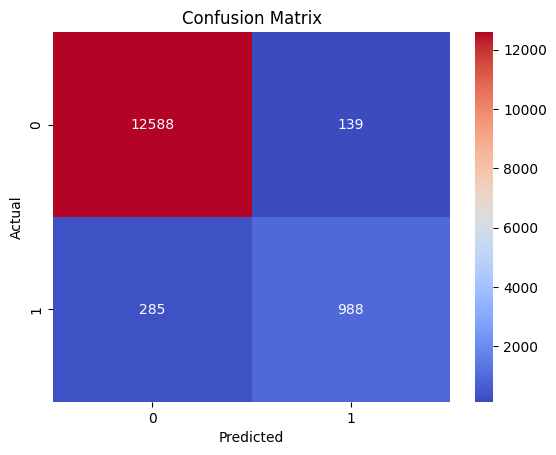

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Display the structure of the dataset
print(mnist.keys())

# Features and target
X, y = mnist["data"], mnist["target"]

# Convert target to integers
y = y.astype(int)

# Create a binary target variable for detecting the digit '5'
y_binary = (y == 5)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Scale the data (important for SGD)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(float))
X_test_scaled = scaler.transform(X_test.astype(float))

# Initialize the SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

# Train the classifier
sgd_clf.fit(X_train_scaled, y_train)

# Predict using the trained classifier
y_train_pred = sgd_clf.predict(X_train_scaled)
y_test_pred = sgd_clf.predict(X_test_scaled)

# Evaluate the classifier
print("Training accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing accuracy:", accuracy_score(y_test, y_test_pred))

print("\nClassification Report (Test Data):\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix (Test Data):\n", confusion_matrix(y_test, y_test_pred))

# Plotting the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="coolwarm")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.0 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Features and target
X, y = mnist["data"], mnist["target"]

# Convert target to integers
y = y.astype(int)

# Create a binary target variable for detecting the digit '5'
y_binary = (y == 5)

# Scale the data (important for SGD)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.astype(float))

# Initialize the SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
# Evaluate the classifier using cross-validation
cross_val_scores = cross_val_score(sgd_clf, X_scaled, y_binary, cv=5, scoring="accuracy")

# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)
print("Mean cross-validation score:", np.mean(cross_val_scores))

Cross-validation scores: [0.973      0.97078571 0.96592857 0.96692857 0.9725    ]
Mean cross-validation score: 0.9698285714285714


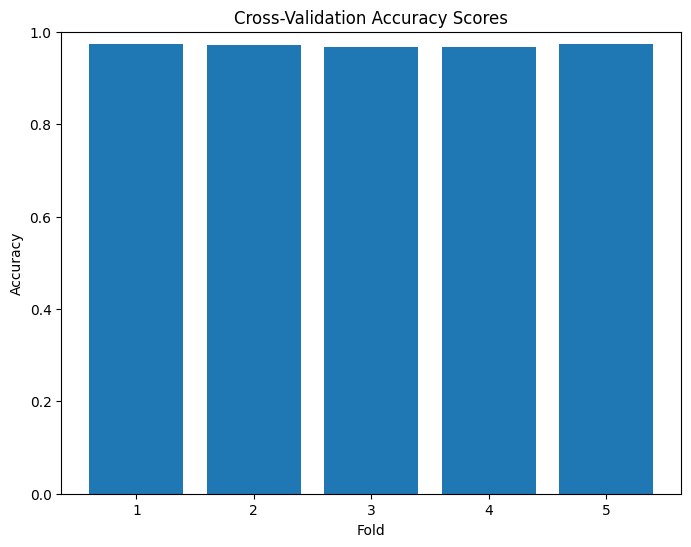

In [ ]:
# Visualize the cross-validation scores using a bar plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(cross_val_scores) + 1), cross_val_scores)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy Scores')
plt.xticks(range(1, len(cross_val_scores) + 1))
plt.ylim(0, 1)
plt.show()

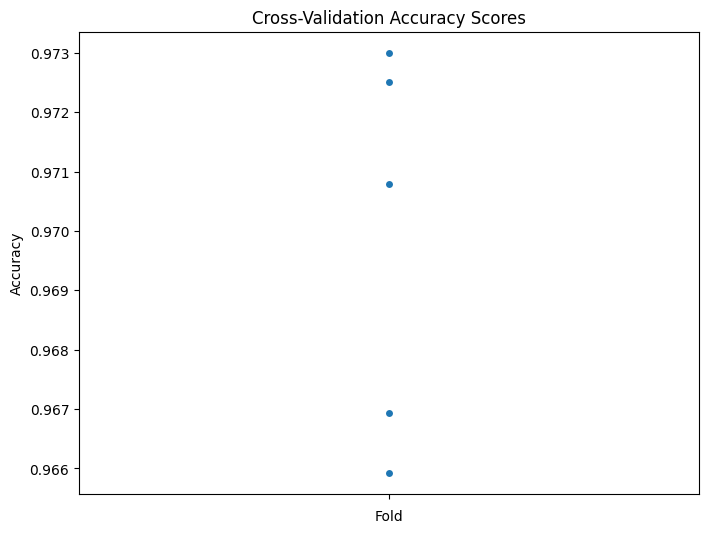

In [ ]:
# Visualize the cross-validation scores using a swarm plot
plt.figure(figsize=(8, 6))
sns.swarmplot(data=cross_val_scores)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy Scores')
plt.show()

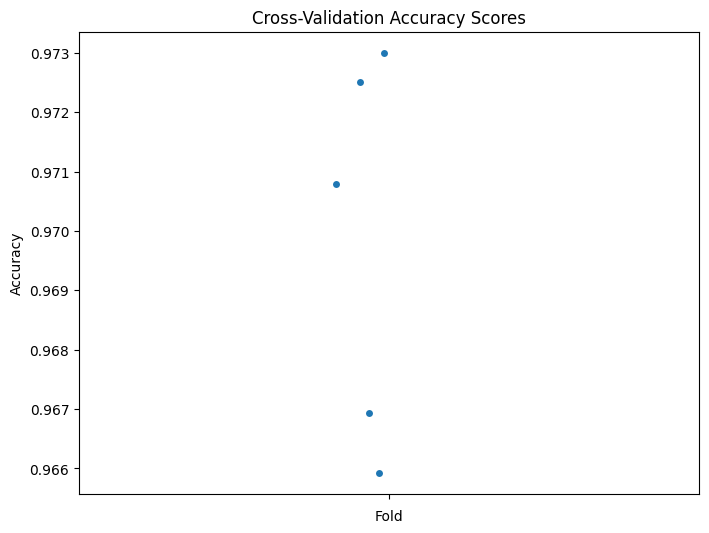

In [ ]:
# Visualize the cross-validation scores using a strip plot
plt.figure(figsize=(8, 6))
sns.stripplot(data=cross_val_scores, jitter=True)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy Scores')
plt.show()

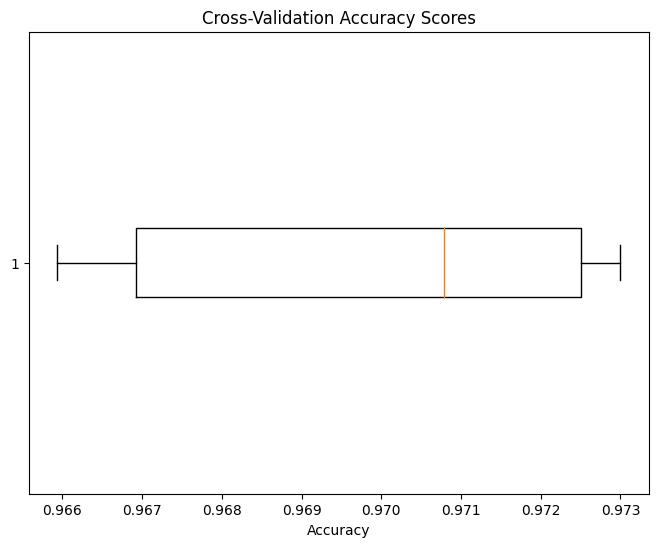

In [ ]:
# Visualize the cross-validation scores using a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(cross_val_scores, vert=False)
plt.xlabel('Accuracy')
plt.title('Cross-Validation Accuracy Scores')
plt.show()

In [2]:
import seaborn as sns

In [5]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target

# Convert the target to integer type
y = y.astype(np.int8)

# Create a binary target variable for detecting the digit '5'
y_binary = (y == 5)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DummyClassifier with the 'most_frequent' strategy
dummy_clf = DummyClassifier(strategy="most_frequent")

# Fit the classifier on the training data
dummy_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dummy_clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'DummyClassifier accuracy (most_frequent): {accuracy:.4f}')


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


DummyClassifier accuracy (most_frequent): 0.1143


In [6]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target

# Convert the target to integer type
y = y.astype(np.int8)

# Create a binary target variable for detecting the digit '5'
y_binary = (y == 5)


# Create a DummyClassifier with the 'most_frequent' strategy
dummy_clf = DummyClassifier(strategy="most_frequent")

# Perform 5-fold cross-validation
scores = cross_val_score(dummy_clf, X, y, cv=5, scoring='accuracy')

# Print the cross-validation accuracy scores
print(f'Cross-validation accuracy scores: {scores}')
print(f'Mean cross-validation accuracy: {scores.mean():.4f}')


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Cross-validation accuracy scores: [0.11257143 0.11257143 0.1125     0.1125     0.1125    ]
Mean cross-validation accuracy: 0.1125


In [7]:
y_train_5 =(y_train =='5')
y_test_5 = (y_test == '5')

In [13]:
dummy_clf =DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train))) # prints False no 5s detected


False


#Performance Measures

#Measuring Accuracy Using Cross Validation

In [14]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([1., 1., 1.])

In [18]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import SGDClassifier

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target

# Convert the target to integer type
y = y.astype(np.int8)

# Create binary target variable for '5'
y_5 = (y == 5)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create binary target variables for the training and test sets
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

# Instantiate the SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

# Fit the classifier on the training data
sgd_clf.fit(X_train, y_train_5)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(sgd_clf, X, y_5, cv=5, scoring='accuracy')

# Print the cross-validation accuracy scores
print(f'Cross-validation accuracy scores: {cv_scores}')
print(f'Mean cross-validation accuracy: {cv_scores.mean():.4f}')


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Cross-validation accuracy scores: [0.96871429 0.96371429 0.94642857 0.9655     0.95757143]
Mean cross-validation accuracy: 0.9604


In [19]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target

# Convert the target to integer type
y = y.astype(np.int8)

# Create a DummyClassifier with the 'most_frequent' strategy
dummy_clf = DummyClassifier(strategy="most_frequent")

# Perform 5-fold cross-validation
cv_scores = cross_val_score(dummy_clf, X, y, cv=5, scoring='accuracy')

# Print the cross-validation accuracy scores
print(f'Cross-validation accuracy scores: {cv_scores}')
print(f'Mean cross-validation accuracy: {cv_scores.mean():.4f}')


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Cross-validation accuracy scores: [0.11257143 0.11257143 0.1125     0.1125     0.1125    ]
Mean cross-validation accuracy: 0.1125


##This is why accuracy is not the prefered performance measure or classifiers, especially for skewed datasets.The best is to look at the confussion metrics

In [20]:
cross_val_score(dummy_clf, X_train,y_train_5,cv=3,scoring="accuracy")

array([0.91000161, 0.91000161, 0.90999679])

### The StratifiedKFold class performs stratified sampling to produce folds that contains a representative ratio of each class.At each iteration the code creates a clone of classifier, trains that clone on the training folds, and makes predictions on the test fold.Then counts the number of correct predictios and outputs the ratio of correct predictions.

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [25]:
skfolds =StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(X_train, y_train,y_train_5):

    clone_clf = clone(sgd_clf)
X_train_folds = X_train[train_index]
y_train_folds = y_train_5[train_index]
X_test_fold = X_train[test_index]
y_test_fold = y_train_5[test_index]

clone_clf.fit(X_train_folds, y_train_folds)
y_pred = clone_clf.predict(X_test_fold)
n_correct = sum(y_pred == y_test_fold)
print(n_correct / len(y_pred))

0.9624450873245473


#Confusion Matrices

In [27]:
from sklearn.model_selection import cross_val_predict

The confusion matrics is to count the number of times instances of class A are classified as class B for all A/B pairs.For example, to know the number of times the classifier confused images of 8s with 0s, you would look at row 8 columns 0 of the confusion matrix.


Just like the cross_val_score() function, cross_val_predict() performs k-fold cross validation but instead of returning the evaluation scores,it returns the predictions made on each test fold,that means you can get a clean prediction from the training set("by cean "1 mean "Out of shape": the model makes predictions on data that it never saw during training

In [28]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

Confusion matrix using the confussion_matrix() function

In [30]:
from sklearn.metrics import confusion_matrix

In [32]:
cm = confusion_matrix(y_train_5, y_train_pred)

In [33]:
cm

array([[50287,   673],
       [ 1180,  3860]])

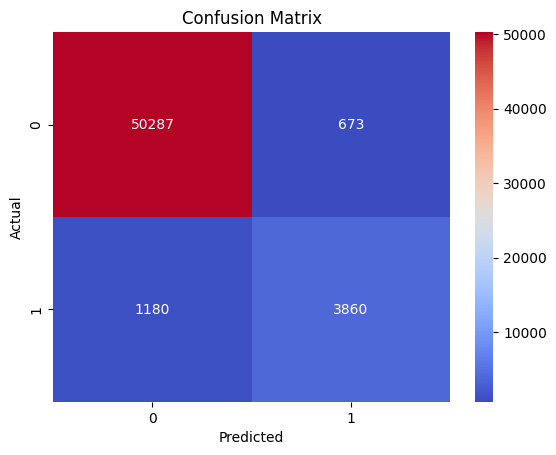

In [34]:
# Plotting the confusion matrix
sns.heatmap(confusion_matrix(y_train_5, y_train_pred), annot=True, fmt="d", cmap="coolwarm")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()